<a href="https://colab.research.google.com/github/souptikmajumder/NGO-business-analysis/blob/master/PCA_Clustering__Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [0]:
df = pd.read_csv('Country-data.csv')

In [0]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [0]:
df.info()               # no - null values 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


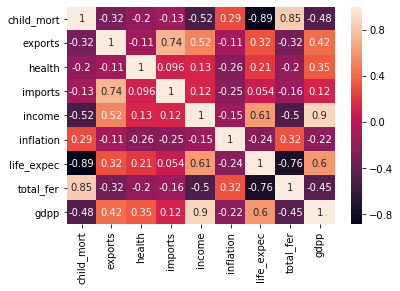

In [0]:
sns.heatmap(df.corr(),annot=True)

In [0]:
df.shape

(167, 10)

In [0]:
df.isna().sum() # we don't have null values  in any column

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

## PCA

In [0]:
df_data = df.drop(columns=['country'])

In [0]:
df_data.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


#### standardising and scaling data

In [0]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
df_data_scaled = standard_scaler.fit_transform(df_data)

In [0]:
df_data_scaled = pd.DataFrame(df_data_scaled)

In [0]:
df_data_scaled.head()

,0,1,2,3,4,5,6,7,8
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817


In [0]:
#Importing the PCA Module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [0]:
#Performing the PCA
pca.fit(df_data_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='randomized', tol=0.0, whiten=False)

In [0]:
#List of pca components
pca.components_

array([[-0.41951945,  0.28389698,  0.15083782,  0.16148244,  0.39844111,
        -0.19317293,  0.42583938, -0.40372896,  0.39264482],
       [ 0.19288394,  0.61316349, -0.24308678,  0.67182064,  0.02253553,
        -0.00840447, -0.22270674,  0.15523311, -0.0460224 ],
       [-0.02954353,  0.14476069, -0.59663237, -0.29992674,  0.3015475 ,
         0.64251951,  0.11391854,  0.01954925,  0.12297749],
       [ 0.37065326,  0.00309102,  0.4618975 , -0.07190746,  0.39215904,
         0.15044176, -0.20379723,  0.37830365,  0.53199457],
       [-0.16896968,  0.05761584,  0.51800037,  0.25537642, -0.2471496 ,
         0.7148691 ,  0.1082198 , -0.13526221, -0.18016662],
       [ 0.20062815, -0.05933283,  0.00727646, -0.03003154,  0.16034699,
         0.06628537, -0.60112652, -0.75068875,  0.01677876],
       [-0.07948854, -0.70730269, -0.24983051,  0.59218953,  0.09556237,
         0.10463252,  0.01848639,  0.02882643,  0.24299776],
       [-0.68274306, -0.01419742,  0.07249683, -0.02894642,  0

In [0]:
pca.explained_variance_ratio_

array([0.4595174 , 0.17181626, 0.13004259, 0.11053162, 0.07340211,
       0.02484235, 0.0126043 , 0.00981282, 0.00743056])

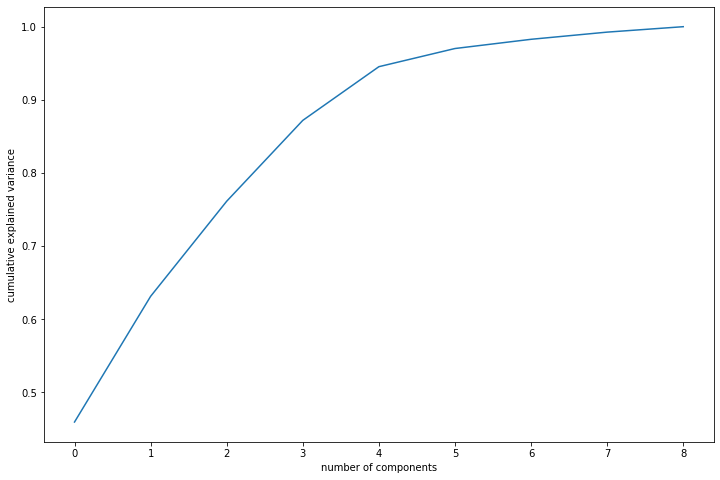

In [0]:
#plotting a scree plot
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [0]:
# we can see that 95% of the total variance can be explained by 5 principal components

In [0]:
features = df_data.columns
pca_feature_list = pd.DataFrame({'Features':features,'PC1':pca.components_[0],'PC2':pca.components_[1],'PC3':pca.components_[2],'PC4':pca.components_[3],'PC5':pca.components_[5]})
pca_feature_list

,Features,PC1,PC2,PC3,PC4,PC5
0,child_mort,-0.419519,0.192884,-0.029544,0.370653,0.200628
1,exports,0.283897,0.613163,0.144761,0.003091,-0.059333
2,health,0.150838,-0.243087,-0.596632,0.461897,0.007276
3,imports,0.161482,0.671821,-0.299927,-0.071907,-0.030032
4,income,0.398441,0.022536,0.301548,0.392159,0.160347
5,inflation,-0.193173,-0.008404,0.642520,0.150442,0.066285
6,life_expec,0.425839,-0.222707,0.113919,-0.203797,-0.601127
7,total_fer,-0.403729,0.155233,0.019549,0.378304,-0.750689
8,gdpp,0.392645,-0.046022,0.122977,0.531995,0.016779


### Visualising the variance explained along each Principal Component

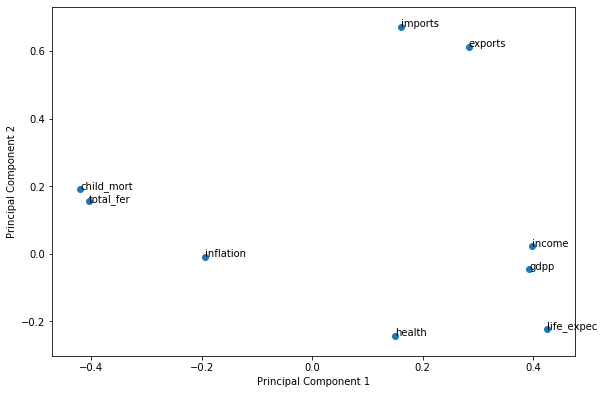

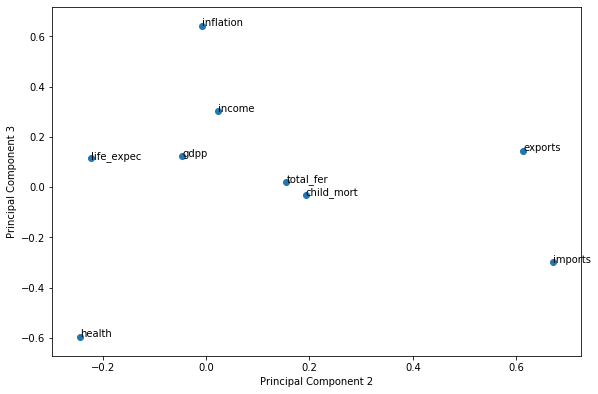

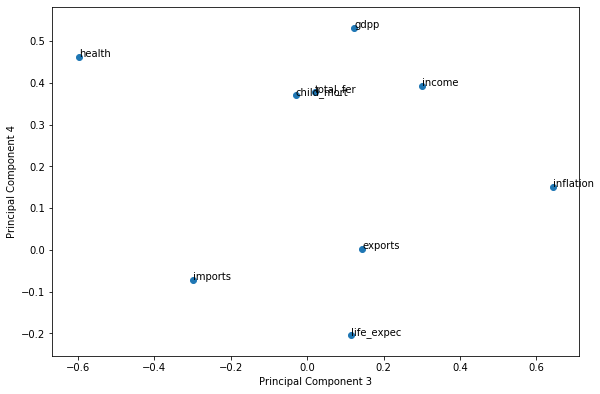

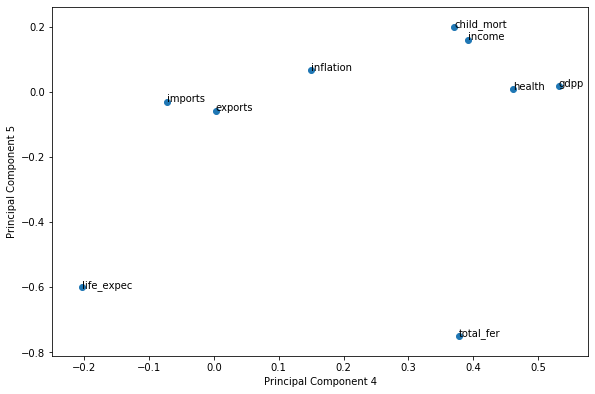

In [0]:
fig = plt.figure(figsize = (16,16))
plt.subplot(321)
plt.scatter(pca_feature_list.PC1, pca_feature_list.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pca_feature_list.Features):
    plt.annotate(txt, (pca_feature_list.PC1[i],pca_feature_list.PC2[i]))
plt.tight_layout()
plt.show()
%matplotlib inline
fig = plt.figure(figsize = (16,16))
plt.subplot(322)
plt.scatter(pca_feature_list.PC2, pca_feature_list.PC3)
plt.xlabel('Principal Component 2')
plt.ylabel('Principal Component 3')
for i, txt in enumerate(pca_feature_list.Features):
    plt.annotate(txt, (pca_feature_list.PC2[i],pca_feature_list.PC3[i]))
plt.tight_layout()
plt.show()
fig = plt.figure(figsize = (16,16))
plt.subplot(323)
plt.scatter(pca_feature_list.PC3, pca_feature_list.PC4)
plt.xlabel('Principal Component 3')
plt.ylabel('Principal Component 4')
for i, txt in enumerate(pca_feature_list.Features):
    plt.annotate(txt, (pca_feature_list.PC3[i],pca_feature_list.PC4[i]))
plt.tight_layout()
plt.show()
fig = plt.figure(figsize = (16,16))
plt.subplot(324)
plt.scatter(pca_feature_list.PC4, pca_feature_list.PC5)
plt.xlabel('Principal Component 4')
plt.ylabel('Principal Component 5')
for i, txt in enumerate(pca_feature_list.Features):
    plt.annotate(txt, (pca_feature_list.PC4[i],pca_feature_list.PC5[i]))
plt.tight_layout()
plt.show()

In [0]:
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=5)

In [0]:
df_pca = pca_final.fit_transform(df_data_scaled)
final_pca_df=pd.DataFrame(df_pca)
final_pca_df.columns=['PC1','PC2','PC3','PC4','PC5']
final_pca_df.head()

,PC1,PC2,PC3,PC4,PC5
0,-2.913000,0.091969,-0.721242,1.001838,-0.146765
1,0.429870,-0.589373,-0.328611,-1.165014,0.153205
2,-0.285289,-0.452139,1.232051,-0.857767,0.191227
3,-2.932714,1.698771,1.525076,0.855595,-0.214778
4,1.033371,0.133853,-0.216699,-0.846638,-0.193186


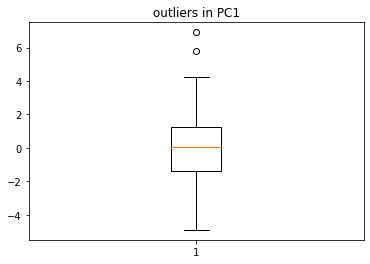

In [0]:
## Let's perform Outlier Analysis
#Let's do the outlier analysis before proceeding to clustering
#We can reassign the outliers to the clusters later
plt.boxplot(final_pca_df.PC1)
Q1 = final_pca_df.PC1.quantile(0.05)
Q3 = final_pca_df.PC1.quantile(0.95)
IQR = Q3 - Q1
#final_pca_df = final_pca_df[(final_pca_df.PC1 >= Q1) & (final_pca_df.PC1 <= Q3)]
plt.title('outliers in PC1')
plt.show()

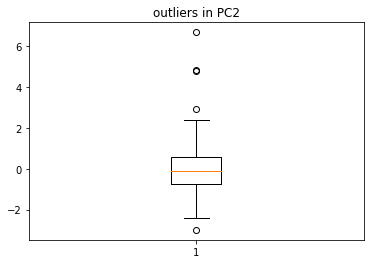

In [0]:
plt.boxplot(final_pca_df.PC2)
Q1 = final_pca_df.PC2.quantile(0.05)
Q3 = final_pca_df.PC2.quantile(0.95)
IQR = Q3 - Q1
#final_pca_df = final_pca_df[(final_pca_df.PC2 >= Q1) & (final_pca_df.PC2 <= Q3)]
plt.title('outliers in PC2')
plt.show()

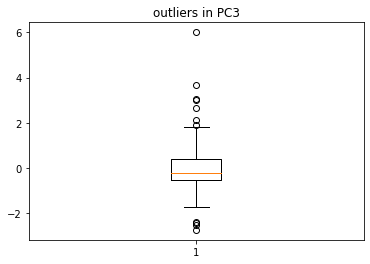

In [0]:
plt.boxplot(final_pca_df.PC3)
Q1 = final_pca_df.PC3.quantile(0.05)
Q3 = final_pca_df.PC3.quantile(0.95)
IQR = Q3 - Q1
#final_pca_df = final_pca_df[(final_pca_df.PC3 >= Q1) & (final_pca_df.PC3 <= Q3)]
plt.title('outliers in PC3')
plt.show()

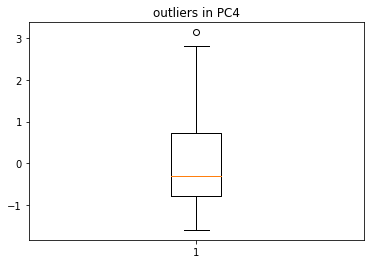

In [0]:
plt.boxplot(final_pca_df.PC4)
Q1 = final_pca_df.PC4.quantile(0.05)
Q3 = final_pca_df.PC4.quantile(0.95)
IQR = Q3 - Q1
#final_pca_df = final_pca_df[(final_pca_df.PC4 >= Q1) & (final_pca_df.PC4 <= Q3)]
plt.title('outliers in PC4')
plt.show()

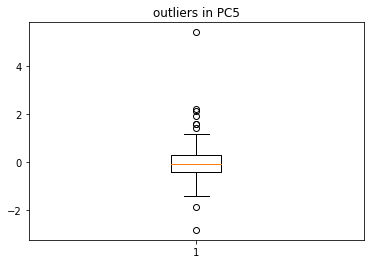

In [0]:
plt.boxplot(final_pca_df.PC5)
Q1 = final_pca_df.PC5.quantile(0.05)
Q3 = final_pca_df.PC5.quantile(0.95)
IQR = Q3 - Q1
#final_pca_df = final_pca_df[(final_pca_df.PC5 >= Q1) & (final_pca_df.PC5 <= Q3)]
plt.title('outliers in PC5')
plt.show()

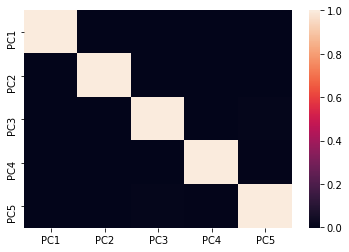

In [0]:
sns.heatmap(final_pca_df.corr())

In [0]:
# We see that the multicollinearity among the 5 PCS is very less and can be stated as linearly independent

In [0]:
final_pca_df.shape #final dataframe after PCA and considering data within InterQuartile Range

(167, 5)

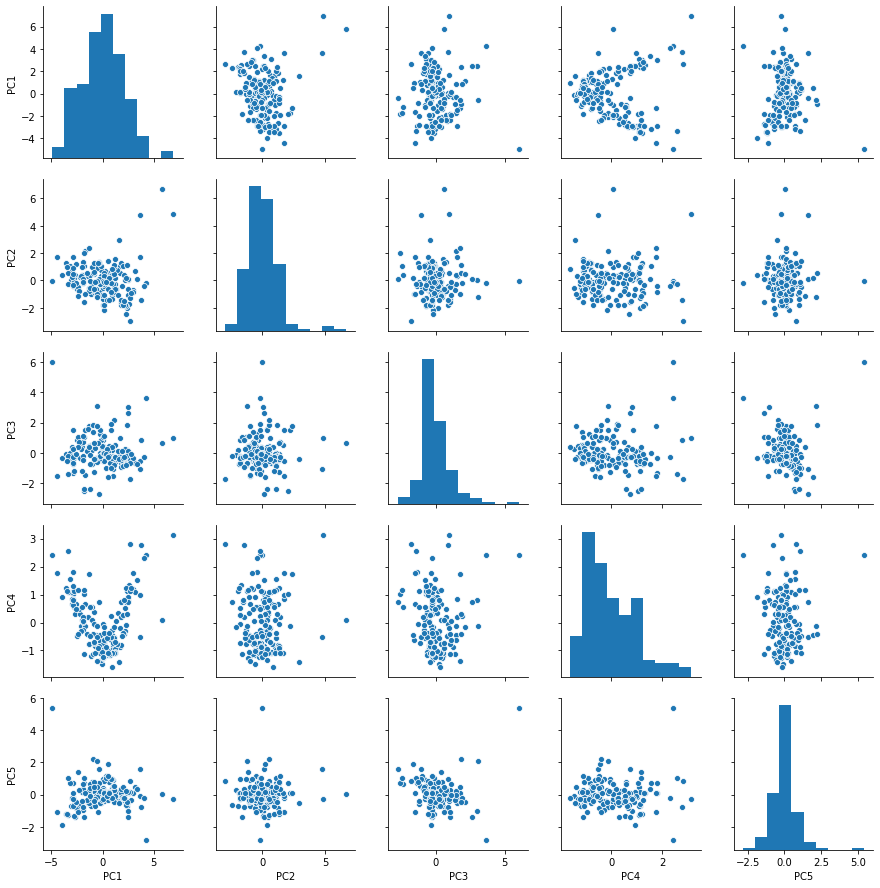

In [0]:
sns.pairplot(final_pca_df)

In [0]:
#eventhough we don't find visible clusters, we have to see the hopkins statistic score before proceeding with clustering


### Clustering

In [0]:
#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [0]:
hopkins(final_pca_df)

0.7967417847613794

In [0]:
# hopkins score comes within a range of 0.56 to 0.71.

In [0]:
cluster_df = final_pca_df

## Hierarchial clustering

In [0]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
from sklearn.cluster import AgglomerativeClustering



[]

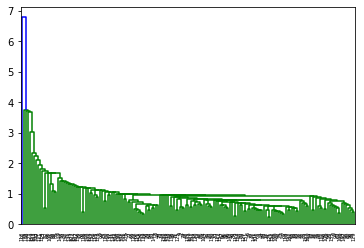

In [0]:
#single linkage
single_mergings = linkage(cluster_df,method='single',metric='Euclidean')
dendrogram(single_mergings)
plt.plot()

(166, 4)

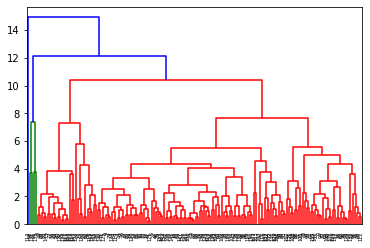

In [0]:
#complete linkage
complete_mergings = linkage(cluster_df,method='complete',metric='Euclidean')
dendrogram(complete_mergings)
#plt.plot()
complete_mergings.shape

Using sklearn.AglomerativeClustering to group data in hierarchial Clustering

In [0]:
clustering = AgglomerativeClustering(n_clusters = 3).fit(cluster_df) # Using sklearn for agglomerative clustering
print(clustering.labels_.shape)

(167,)


In [0]:
cluster_id = cut_tree(complete_mergings,n_clusters=3).reshape(-1,)
cluster_id.shape

(167,)

In [0]:
#concatinating cluster labels to the original dataframe 
df_final_clustered_hierarchial = pd.merge(df,cluster_df,left_index=True,right_index=True)
df_final_clustered_hierarchial.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp', 'PC1', 'PC2', 'PC3',
       'PC4', 'PC5'],
      dtype='object')

Please note that sklearn.agglomerative_clustering uses 'ward' linkage which uses optimisation technique  to reduce cost-function(Square-Error Distance)like K-Means used in Hierarchial Clustering method. The approach of using Complete or Single linkage does not give us significant result as the entire data is clustered enough and if eucledian distance is the metric chosen, then most of the datapoints will fall under identical cluster.

In [0]:
df_final_clustered_hierarchial['Cluster_ID']=cluster_id
df_final_clustered_hierarchial['Clusters']=clustering.labels_
df_final_clustered_hierarchial.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC1,PC2,PC3,PC4,PC5,Cluster_ID,Clusters
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,-2.913000,0.091969,-0.721242,1.001838,-0.146765,0,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0.429870,-0.589373,-0.328611,-1.165014,0.153205,0,2
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,-0.285289,-0.452139,1.232051,-0.857767,0.191227,0,2
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,-2.932714,1.698771,1.525076,0.855595,-0.214778,0,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1.033371,0.133853,-0.216699,-0.846638,-0.193186,0,2


In [0]:
print(df_final_clustered_hierarchial['Clusters'].value_counts()) # please note that sklearn.agglomerative_clustering uses ward linkage which is kinda optimisation algorithm like k - means
print(df_final_clustered_hierarchial['Cluster_ID'].value_counts()) 

2    82
1    52
0    33
Name: Clusters, dtype: int64
0    162
1      4
2      1
Name: Cluster_ID, dtype: int64


In [0]:
df_final_clustered_hierarchial = df_final_clustered_hierarchial.drop(columns=['PC1','PC2','PC3','PC4','PC5'])
df_final_clustered_hierarchial.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_ID,Clusters
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0,2
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0,2
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0,2


In [0]:
countries_label_2 = df_final_clustered_hierarchial[df_final_clustered_hierarchial['Clusters']==2]['country']
countries_label_1 = df_final_clustered_hierarchial[df_final_clustered_hierarchial['Clusters']==1]['country']
countries_label_0 = df_final_clustered_hierarchial[df_final_clustered_hierarchial['Clusters']==0]['country']

In [0]:
print(np.array(countries_label_0))
print('\n')
print(np.array(countries_label_1))
print('\n')
print(np.array(countries_label_2))
print('\n')


['Australia' 'Austria' 'Bahrain' 'Belgium' 'Brunei' 'Canada' 'Denmark'
 'Finland' 'France' 'Germany' 'Greece' 'Iceland' 'Ireland' 'Italy' 'Japan'
 'Kuwait' 'Libya' 'Luxembourg' 'Malta' 'Netherlands' 'New Zealand'
 'Norway' 'Oman' 'Portugal' 'Qatar' 'Saudi Arabia' 'Singapore' 'Spain'
 'Sweden' 'Switzerland' 'United Arab Emirates' 'United Kingdom'
 'United States']


['Afghanistan' 'Angola' 'Benin' 'Botswana' 'Burkina Faso' 'Burundi'
 'Cameroon' 'Central African Republic' 'Chad' 'Comoros' 'Congo, Dem. Rep.'
 'Congo, Rep.' "Cote d'Ivoire" 'Equatorial Guinea' 'Eritrea' 'Gabon'
 'Gambia' 'Ghana' 'Guinea' 'Guinea-Bissau' 'Haiti' 'Iraq' 'Kenya'
 'Kiribati' 'Lao' 'Lesotho' 'Liberia' 'Madagascar' 'Malawi' 'Mali'
 'Mauritania' 'Micronesia, Fed. Sts.' 'Mongolia' 'Mozambique' 'Myanmar'
 'Namibia' 'Niger' 'Nigeria' 'Pakistan' 'Rwanda' 'Senegal' 'Sierra Leone'
 'Solomon Islands' 'South Africa' 'Sudan' 'Tanzania' 'Timor-Leste' 'Togo'
 'Uganda' 'Venezuela' 'Yemen' 'Zambia']


['Albania' 'Algeria' 'Ant

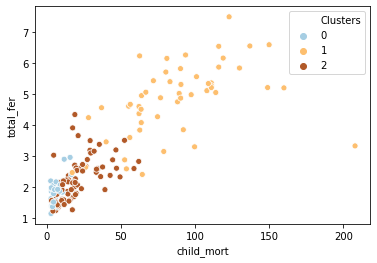

In [0]:
sns.scatterplot(x='child_mort',y='total_fer',hue='Clusters',data=df_final_clustered_hierarchial,palette='Paired')

<b>Child Mortality Rate is high in category 1 countries mostly in <b>African Continent</b>. <br>
<i>Category 1</i> countries are mostly <b>African countries.</b>

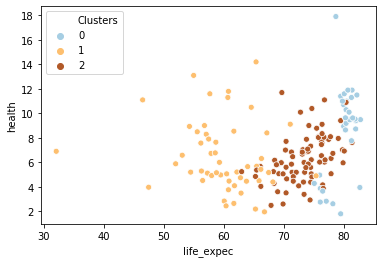

In [0]:
sns.scatterplot(x='life_expec',y='health',hue='Clusters',data=df_final_clustered_hierarchial,palette='Paired')

<b>Most of the african countries have lowest GDP per capita and low income.</b>

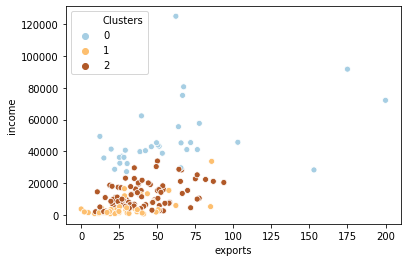

In [0]:
sns.scatterplot(x='exports',y='income',hue='Clusters',data=df_final_clustered_hierarchial,palette='Paired')

Lets figure out the top 5 countries requiring urgent help in reducing child mortality rate,low income ,low health and low life expectancy in category 1

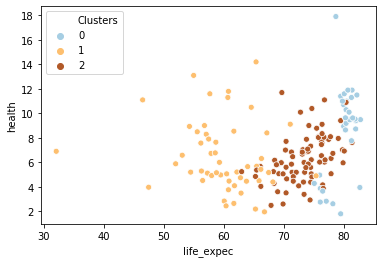

In [0]:
sns.scatterplot(x='life_expec',y='health',hue='Clusters',data=df_final_clustered_hierarchial,palette='Paired')

### K-Means Clustering

In [0]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [0]:
ss_score = []   #array for storing the silhouette score
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k).fit(cluster_df)
    ss_score.append([k, silhouette_score(cluster_df, kmeans.labels_)])

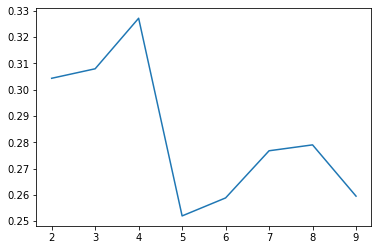

In [0]:
plt.plot(pd.DataFrame(ss_score)[0],pd.DataFrame(ss_score)[1])

In [0]:
#from the silhouette score , we find that the number of clusters can be 3. Let's verify with elbow-curve method
ss_score

[[2, 0.304339954285527],
 [3, 0.3079553690964611],
 [4, 0.32718863090038236],
 [5, 0.2519641694787017],
 [6, 0.25881182794108826],
 [7, 0.27675619299482374],
 [8, 0.2790000462333079],
 [9, 0.2594896413694184]]

In [0]:
intra_cluster_distance=[]
for i in range(1,10):
    model_clus = KMeans(n_clusters=i,max_iter=50)
    model_clus.fit(cluster_df)
    intra_cluster_distance.append(model_clus.inertia_)

In [0]:
intra_cluster_distance

[1420.4750380211162,
 968.1808440726795,
 749.3671135105592,
 618.8038947652819,
 539.635740985655,
 470.3431038499433,
 435.01585607762286,
 381.604475016538,
 358.3178146007788]

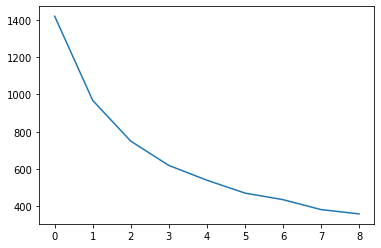

In [0]:
plt.plot(intra_cluster_distance)

In [0]:
model_clus2 = KMeans(n_clusters = 3, max_iter=50,random_state = 50)
model_clus2.fit(cluster_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=50, tol=0.0001, verbose=0)

In [0]:
cluster_df_2 = final_pca_df
cluster_df_2.index = pd.RangeIndex(len(cluster_df_2.index))
cluster_df_final = pd.concat([cluster_df_2, pd.Series(model_clus2.labels_)], axis=1)
cluster_df_final.columns=['PC1','PC2','PC3','PC4','PC5','Labels']
#cluster_df_final.columns = ['PC1', 'PC2','ClusterID']
#cluster_df_final

In [0]:
cluster_df_final.head()

,PC1,PC2,PC3,PC4,PC5,Labels
0,-2.913000,0.091969,-0.721242,1.001838,-0.146765,1
1,0.429870,-0.589373,-0.328611,-1.165014,0.153205,2
2,-0.285289,-0.452139,1.232051,-0.857767,0.191227,2
3,-2.932714,1.698771,1.525076,0.855595,-0.214778,1
4,1.033371,0.133853,-0.216699,-0.846638,-0.193186,2


In [0]:
cluster_df_final['Labels'].value_counts() #count of countries under each category/label

2    84
1    47
0    36
Name: Labels, dtype: int64

In [0]:
cluster_df_final.shape

(167, 6)

In [0]:
#concatinating cluster labels to the original dataframe 
df_final_clustered = pd.merge(df,cluster_df_final,left_index=True,right_index=True)
df_final_clustered.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp', 'PC1', 'PC2', 'PC3',
       'PC4', 'PC5', 'Labels'],
      dtype='object')

In [0]:
df_final_clustered.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC1,PC2,PC3,PC4,PC5,Labels
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,-2.913000,0.091969,-0.721242,1.001838,-0.146765,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0.429870,-0.589373,-0.328611,-1.165014,0.153205,2
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,-0.285289,-0.452139,1.232051,-0.857767,0.191227,2
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,-2.932714,1.698771,1.525076,0.855595,-0.214778,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1.033371,0.133853,-0.216699,-0.846638,-0.193186,2


In [0]:
df_final_clustered = df_final_clustered.drop(columns=['PC1','PC2','PC3','PC4','PC5'])
df_final_clustered.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Labels
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,2
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,2


In [0]:
countries_label_2 = df_final_clustered[df_final_clustered['Labels']==2]['country']
countries_label_1 = df_final_clustered[df_final_clustered['Labels']==1]['country']
countries_label_0 = df_final_clustered[df_final_clustered['Labels']==0]['country']

In [0]:
print(np.array(countries_label_0))
print('\n')
print(np.array(countries_label_1))
print('\n')
print(np.array(countries_label_2))
print('\n')


['Australia' 'Austria' 'Bahrain' 'Belgium' 'Brunei' 'Canada' 'Cyprus'
 'Czech Republic' 'Denmark' 'Finland' 'France' 'Germany' 'Greece'
 'Iceland' 'Ireland' 'Israel' 'Italy' 'Japan' 'Kuwait' 'Luxembourg'
 'Malta' 'Netherlands' 'New Zealand' 'Norway' 'Portugal' 'Qatar'
 'Singapore' 'Slovak Republic' 'Slovenia' 'South Korea' 'Spain' 'Sweden'
 'Switzerland' 'United Arab Emirates' 'United Kingdom' 'United States']


['Afghanistan' 'Angola' 'Benin' 'Botswana' 'Burkina Faso' 'Burundi'
 'Cameroon' 'Central African Republic' 'Chad' 'Comoros' 'Congo, Dem. Rep.'
 'Congo, Rep.' "Cote d'Ivoire" 'Equatorial Guinea' 'Eritrea' 'Gabon'
 'Gambia' 'Ghana' 'Guinea' 'Guinea-Bissau' 'Haiti' 'Iraq' 'Kenya'
 'Kiribati' 'Lao' 'Lesotho' 'Liberia' 'Madagascar' 'Malawi' 'Mali'
 'Mauritania' 'Mozambique' 'Namibia' 'Niger' 'Nigeria' 'Pakistan' 'Rwanda'
 'Senegal' 'Sierra Leone' 'South Africa' 'Sudan' 'Tanzania' 'Timor-Leste'
 'Togo' 'Uganda' 'Yemen' 'Zambia']


['Albania' 'Algeria' 'Antigua and Barbuda' 'Argentina

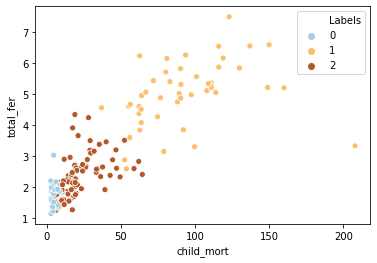

In [0]:
sns.scatterplot(x='child_mort',y='total_fer',hue='Labels',data=df_final_clustered,palette='Paired')

<b>Child Mortality Rate is high in category 1 countries mostly in <b>African Continent</b>. <br>
<i>Category 1</i> countries are mostly <b>African countries.</b>

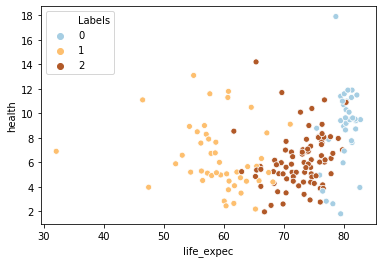

In [0]:
sns.scatterplot(x='life_expec',y='health',hue='Labels',data=df_final_clustered,palette='Paired')

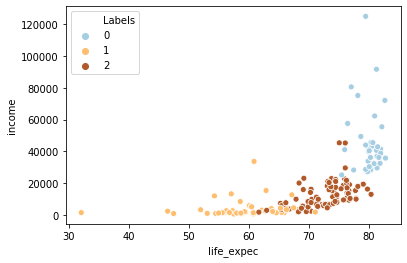

In [0]:
sns.scatterplot(x='life_expec',y='income',hue='Labels',data=df_final_clustered,palette='Paired')

<b>Most of the african countries have lowest GDP per capita and low income.</b>

Lets figure out the top 5 countries requiring urgent help in reducing child mortality rate,low income ,low health and low life expectancy in category 1

In [0]:
child_mort_list= df_final_clustered[df_final_clustered['Labels']==1]['child_mort'].sort_values(ascending=False)[:5]
print(' Top 5 countries having highest child mortality rate:\n')
print(df_final_clustered['country'].iloc[child_mort_list.index].values )# list of top 5 countries having highest mortality rate
low_income_list= df_final_clustered[df_final_clustered['Labels']==1]['health'].sort_values(ascending=True)[:5]
print('\n Top 5 countries having low health:\n')
print(df_final_clustered['country'].iloc[low_income_list.index].values )# list of top 5 countries having low income
low_life_expectancy= df_final_clustered[df_final_clustered['Labels']==1]['life_expec'].sort_values(ascending=True)[:5]
print('\n Top 5 countries having low life expectations:\n')
print(df_final_clustered['country'].iloc[low_life_expectancy.index].values )# list of top 5 countries having low life expectations
low_GDP= df_final_clustered[df_final_clustered['Labels']==1]['gdpp'].sort_values(ascending=True)[:5]
print('\n Top 5 countries having low GDP:\n')
print(df_final_clustered['country'].iloc[low_GDP.index].values )# list of top 5 countries having low GDP


 Top 5 countries having highest child mortality rate:

['Haiti' 'Sierra Leone' 'Chad' 'Central African Republic' 'Mali']

 Top 5 countries having low health:

['Pakistan' 'Congo, Rep.' 'Eritrea' 'Angola' 'Gabon']

 Top 5 countries having low life expectations:

['Haiti' 'Lesotho' 'Central African Republic' 'Zambia' 'Malawi']

 Top 5 countries having low GDP:

['Burundi' 'Liberia' 'Congo, Dem. Rep.' 'Niger' 'Sierra Leone']


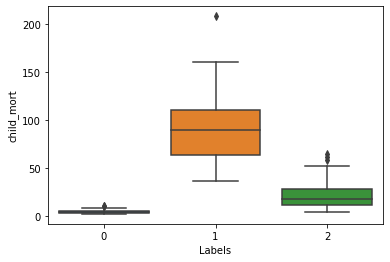

In [0]:
sns_plot1=sns.boxplot(y='child_mort',x='Labels',data=df_final_clustered)
sns_plot1.figure.savefig('plot1.png')

For child mortality rate, we see the box plot above that most countries in category 1(Mostly African Countries ) have highest child mortality rate. 

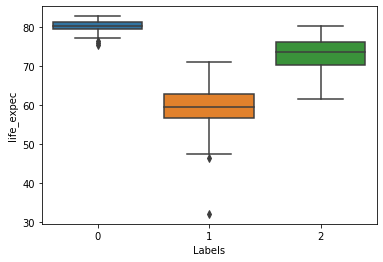

In [0]:
sns_plot2=sns.boxplot(y='life_expec',x='Labels',data=df_final_clustered)
sns_plot2.figure.savefig('plot2.png')

For child mortality rate, we see the box plot above that most countries in category 1(Mostly African Countries ) have lowest life expectancy. 

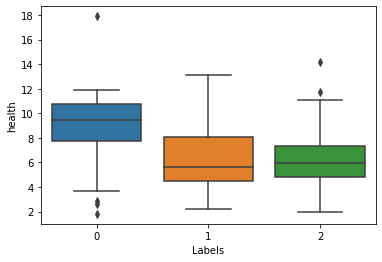

In [0]:
sns_plot3=sns.boxplot(y='health',x='Labels',data=df_final_clustered)
sns_plot3.figure.savefig('plot3.png')

In terms of health, we see that the median health of both countries in category 1 and category 2 are comparable to each other. 

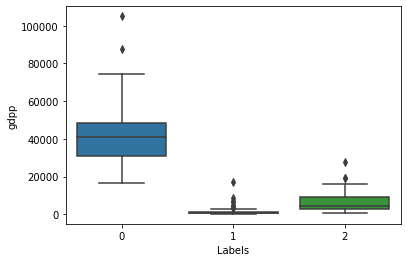

In [0]:
sns_plot4=sns.boxplot(y='gdpp',x='Labels',data=df_final_clustered)
sns_plot4.figure.savefig('plot4.png')

<b>Thus , most countries having critical problems are from African Countries in category 1.</b>